In [25]:
import numpy as np
import matplotlib.pyplot as plt

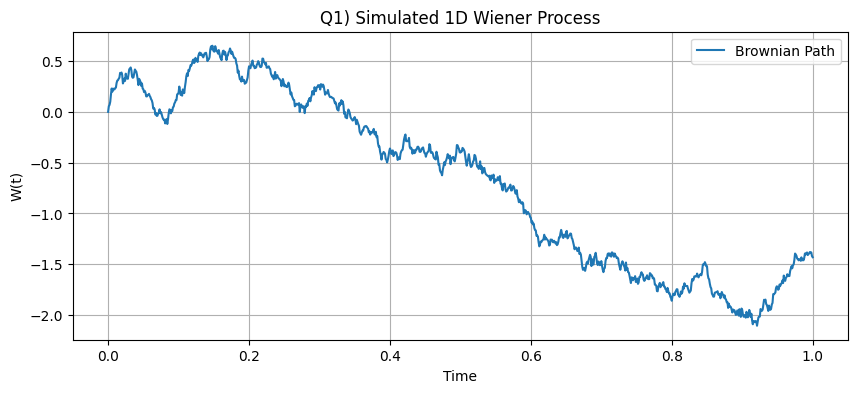

In [26]:
T = 1.0           # Time horizon
N = 1000          # Number of steps
dt = T / N        # Time increment
t = np.linspace(0, T, N+1)

np.random.seed(0)
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
W = np.zeros(N+1)
W[1:] = np.cumsum(dW)

plt.figure(figsize=(10, 4))
plt.plot(t, W, label="Brownian Path")
plt.title("Q1) Simulated 1D Wiener Process")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()


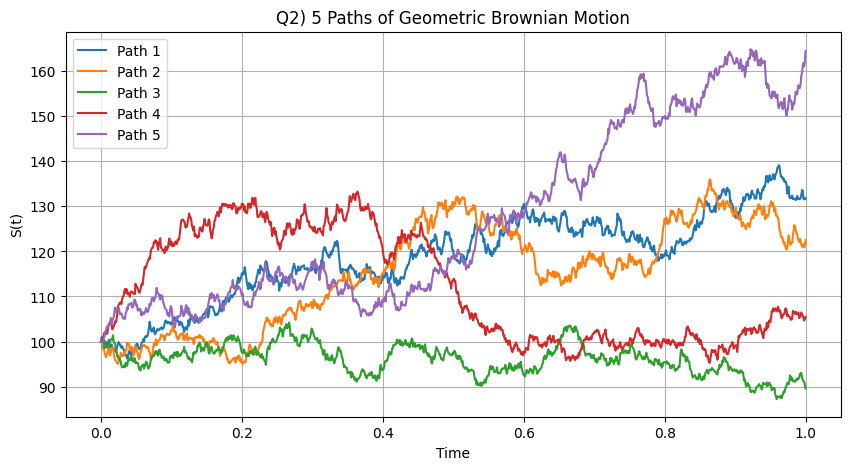

In [27]:
S0 = 100     # Initial stock price
alpha = 0.05 # Drift
sigma = 0.2  # Volatility

plt.figure(figsize=(10, 5))
np.random.seed(1)

for i in range(5):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0.0)
    S = S0 * np.exp(sigma * W + (alpha - 0.5 * sigma ** 2) * t)
    plt.plot(t, S, label=f'Path {i+1}')

plt.title("Q2) 5 Paths of Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
plt.show()


In [28]:
M = 100000
s, t_ = 0.4, 0.7
N = 1000
dt = T / N

ts = int(s / dt)
tt = int(t_ / dt)

np.random.seed(2)
dW = np.random.normal(0, np.sqrt(dt), size=(M, N))
W = np.cumsum(dW, axis=1)
W = np.concatenate((np.zeros((M,1)), W), axis=1)

E_WsWt = np.mean(W[:, ts] * W[:, tt])

print("Q3)")
print(f"Estimated E[W_s * W_t] = {E_WsWt:.4f}")
print(f"Theoretical value (min(s, t)) = {min(s, t_):.4f}")


Q3)
Estimated E[W_s * W_t] = 0.3988
Theoretical value (min(s, t)) = 0.4000


In [29]:
s, t_ = 0.3, 0.9
ts = int(s / dt)
tt = int(t_ / dt)

increments = W[:, tt] - W[:, ts]

mean_inc = np.mean(increments)
var_inc = np.var(increments)

A = W[:, ts] - W[:, 0]
B = W[:, tt] - W[:, ts]
corr = np.corrcoef(A, B)[0, 1]

print("Q4)")
print(f"Mean of W_t - W_s: {mean_inc:.4f} (Expected: 0)")
print(f"Variance of W_t - W_s: {var_inc:.4f} (Expected: {t_ - s})")
print(f"Correlation between non-overlapping increments: {corr:.4f} (Expected: ~0)")


Q4)
Mean of W_t - W_s: 0.0012 (Expected: 0)
Variance of W_t - W_s: 0.6012 (Expected: 0.6000000000000001)
Correlation between non-overlapping increments: -0.0036 (Expected: ~0)


In [30]:

s, t_ = 0.4, 0.8
ts = int(s / dt)
tt = int(t_ / dt)

W_s_fixed = W[:, ts]
W_t_given_Ws = W_s_fixed + np.random.normal(0, np.sqrt(t_ - s), size=M)

E_Wt_given_Fs = np.mean(W_t_given_Ws)

print("Q5)")
print(f"Empirical E[W_t | F_s] ≈ {E_Wt_given_Fs:.4f}")
print(f"Mean of W_s: {np.mean(W_s_fixed):.4f}")


Q5)
Empirical E[W_t | F_s] ≈ -0.0009
Mean of W_s: 0.0010
